<a href="https://colab.research.google.com/github/Karnikasri/House-price-prediction-/blob/main/Linear_regression_on_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.DataFrame(data)

In [89]:
def map_to_binary(column):
    unique_values = column.unique()  # Get unique values in the column
    value_map = {value: idx for idx, value in enumerate(unique_values)}  # Create mapping dictionary
    return column.map(value_map)

columns_to_convert = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']
df[columns_to_convert] = df[columns_to_convert].apply(map_to_binary)


In [90]:
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000     0         0          0        0         0          0   
1    12250000     1         0          1        1         0          0   
2    12250000     2         1          0        2         0          0   
3    12215000     3         0          0        2         0          0   
4    11410000     0         0          2        2         0          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000   112         3          2        3         0          0   
541   1767150   278         1          2        3         1          0   
542   1750000   283         3          2        3         0          0   
543   1750000   271         1          2        3         1          0   
544   1750000   210         1          2        2         0          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [91]:
data = pd.read_csv('Housing.csv')

In [92]:
print(data.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [94]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

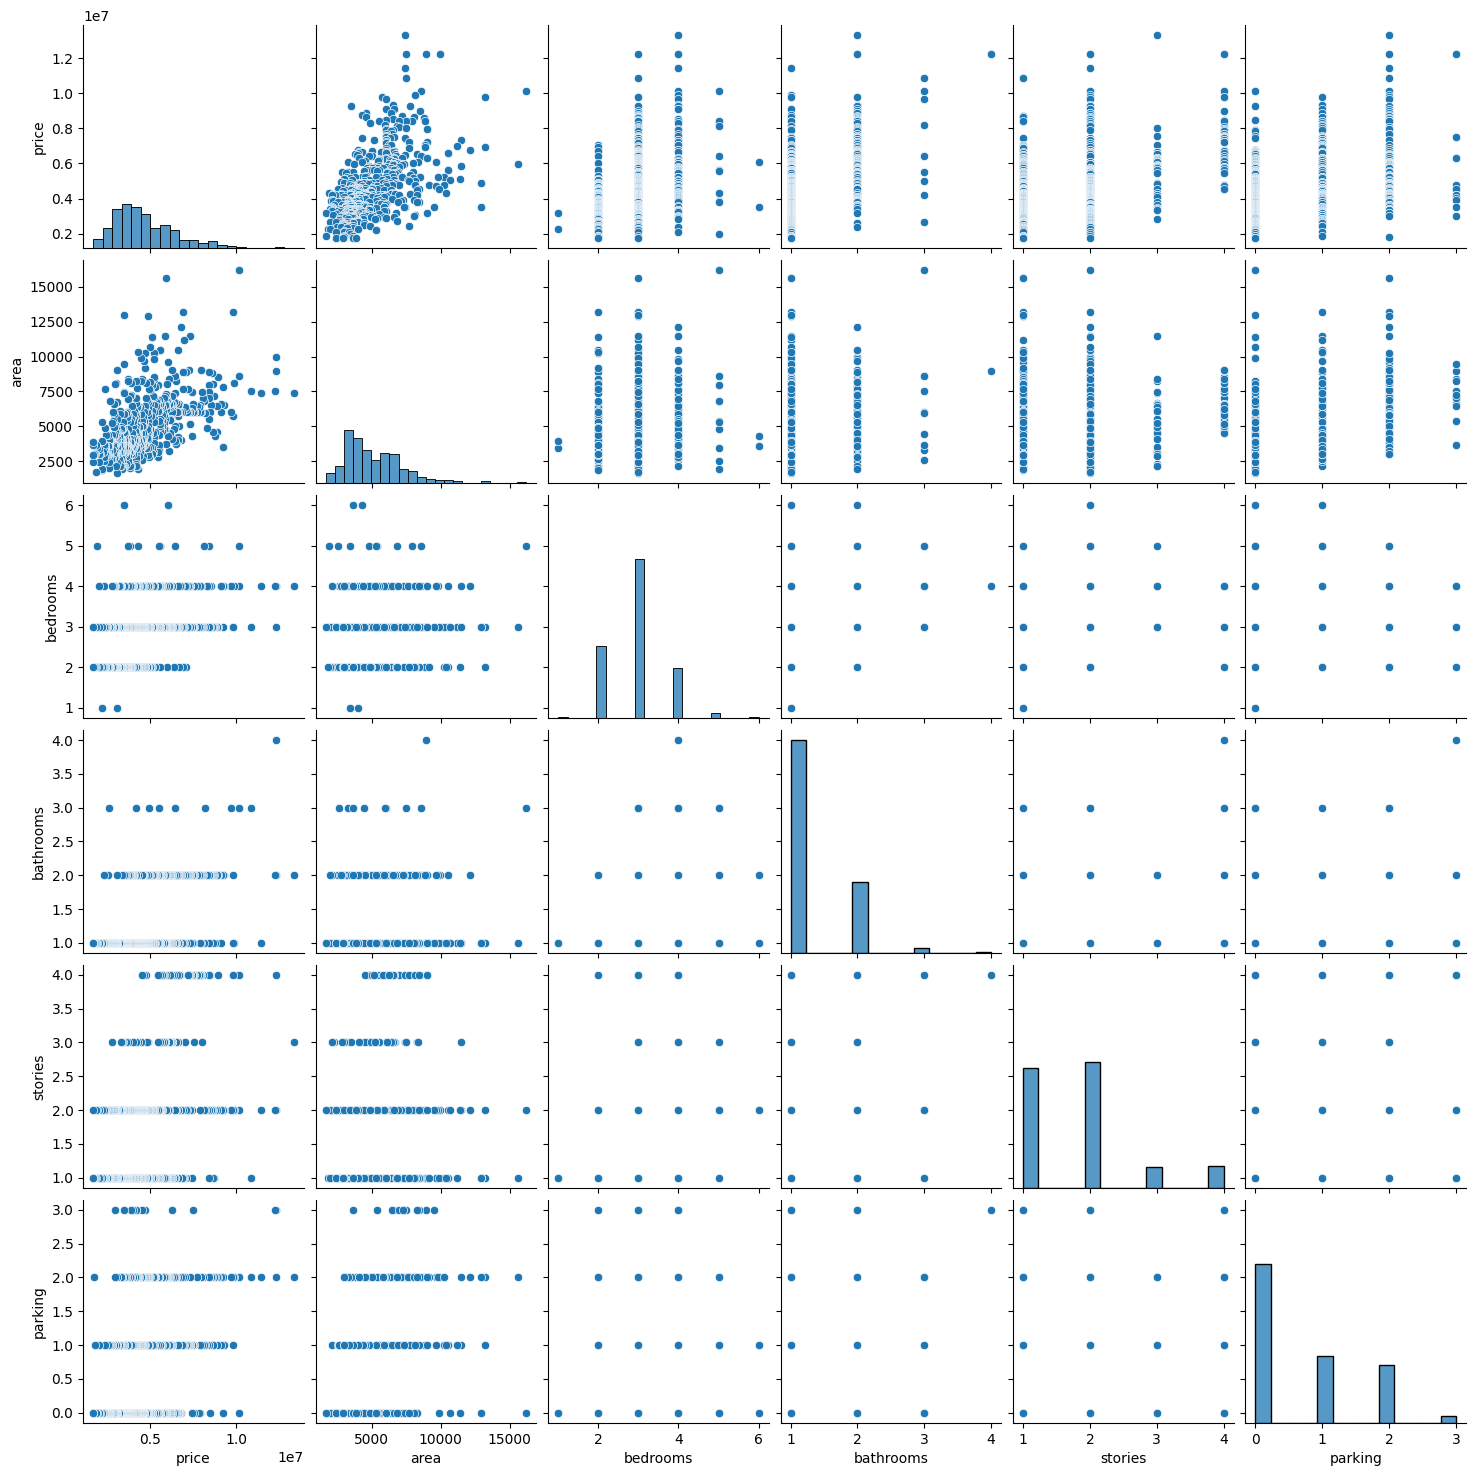

In [95]:
sns.pairplot(data)

<ipython-input-96-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

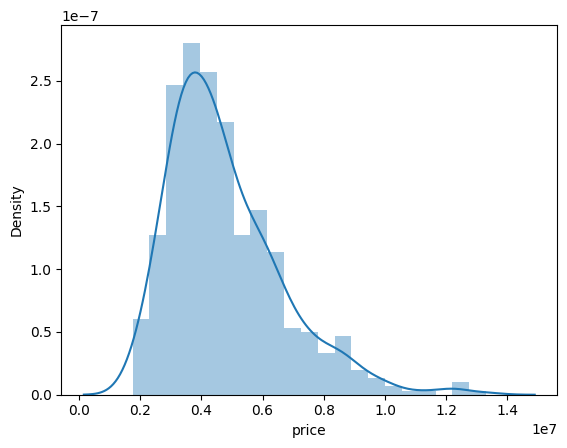

In [96]:
sns.distplot(data['price'])

<Axes: >

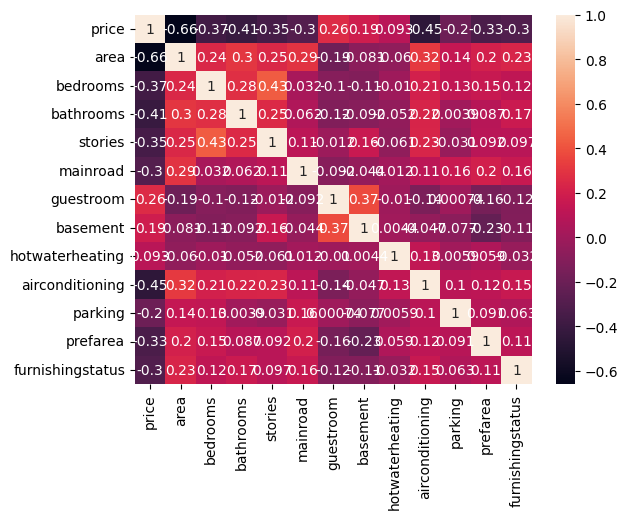

In [97]:
sns.heatmap(df.corr(), annot=True)

In [98]:
x=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']]

In [99]:
y=df[["price"]]

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm=LinearRegression()

In [103]:
lm.fit(x_train,y_train)

LinearRegression()

In [104]:
print(lm.intercept_)

[8192217.88509474]


In [108]:
predictions = lm.predict(x_test)

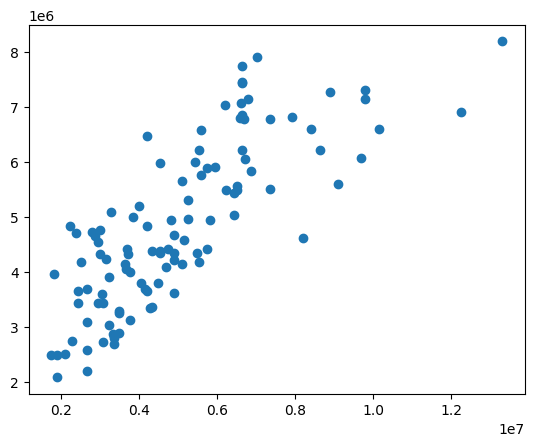

In [109]:
plt.scatter(y_test,predictions)

<ipython-input-110-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


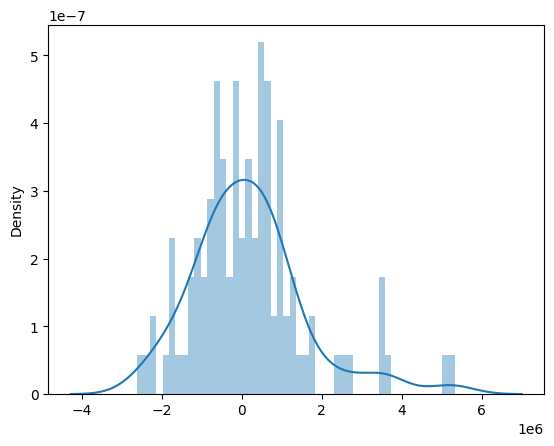

In [110]:
sns.distplot((y_test-predictions),bins=50);

In [111]:
from sklearn import metrics

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1029142.0178653896
MSE: 2021452314302.3948
RMSE: 1421777.8709427132
